# <span style="color:green">Final Project - Explainer Notebook</span>
---

This report is written in the course 02806 Social Data Analysis, spring 2017, based on the assignment description found [here](https://github.com/suneman/socialdataanalysis2017/wiki/Final-Project) for the final exam project. 

## <span style="color:green">Motivation</span>

### <span style="color:green">What is your dataset?</span>

The dataset chosen for this project is from the Public Safety section from the website of New York OpenData -- "NY Traffic Collisions"

### <span style="color:green">Why did you choose this/these particular dataset(s)?</span>

Going through different OpenData sources such as [London OpenData](https://data.london.gov.uk/), [SF OpenData](https://data.sfgov.org/), [European OpenData](https://open-data.europa.eu) that what seemed as a lot of different opportunities in chosing data was in fact not. A lot of the publicly available data was lacking either in size (only a few years) or extremely badly formatted, only with a few features, a lot of missing values etc. What would be nice was if there were several years (5-10) and lots of different features to chose from. This way it would be possible to take some active choices on what to keep or discard and chose what was important for predictions, basic statistics and so on.

Looking into [NYC OpenData](http://opendata.cityofnewyork.us/) and the Public Safety Category, the "Traffic Collisions" dataset was discovered. Here we get information on where in New York different traffic collisions happens, the involved parties, which type of vehicle, whether the driver was distrated/unattentive, the contributing factors, geolocations -- a great level of detail to work on and make predictions on!

In all we have $29$ features and $226.051$ different incidents from 2012 until March 24th 2017 -- the data is soo fresh!

### <span style="color:green">What was your goal for the end user's experience?</span>

## <span style="color:green">Basic stats</span>

### <span style="color:green">Libraries</span>
**Importing needed packages for entire solution**


In [93]:
import urllib2
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from scipy import stats, linalg
from scipy.interpolate import interp1d
import pandas as pd
from collections import Counter 
from operator import itemgetter
import geoplotlib as gpl
from geoplotlib.utils import BoundingBox
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import pylab as pl
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier

# Plotting with plotly
import plotly 
from IPython.display import Image
# Henriettes plotly API key og brugernavn -- gemmer plots i skyen
plotly.tools.set_credentials_file(username='frksteenhoff2', api_key='duu8hsfRmuI5rF2EU8o5')
import plotly.plotly as py
import plotly.graph_objs as go

In [104]:
# Importing data using pandas
traffic_data = pd.read_csv('NY_Traffic_Collisions.csv') # Updated 20th of February

In [105]:
traffic_data[:10]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/24/2017,0:00,BROOKLYN,11220.0,40.633470,-74.021020,"(40.63347, -74.02102)",BAY RIDGE AVENUE,5 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN
1,03/24/2017,0:00,BROOKLYN,11222.0,40.728416,-73.952415,"(40.728416, -73.952415)",CALYER STREET,LEONARD STREET,NaN,...,Unspecified,NaN,NaN,NaN,3638289,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,03/24/2017,0:00,BROOKLYN,11222.0,40.725160,-73.946600,"(40.72516, -73.9466)",NASSAU AVENUE,DIAMOND STREET,NaN,...,Unspecified,NaN,NaN,NaN,3639200,SPORT UTILITY / STATION WAGON,MOTORCYCLE,NaN,NaN,NaN
3,03/24/2017,0:00,BROOKLYN,11229.0,40.607710,-73.957150,"(40.60771, -73.95715)",NaN,NaN,1716 EAST 16 STREET,...,NaN,NaN,NaN,NaN,3639489,NaN,NaN,NaN,NaN,NaN
4,03/24/2017,0:10,BROOKLYN,11234.0,40.614660,-73.923510,"(40.61466, -73.92351)",EAST 53 STREET,FILLMORE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3639728,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
5,03/24/2017,0:37,BROOKLYN,11208.0,40.674026,-73.872360,"(40.674026, -73.87236)",DOSCHER STREET,BELMONT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3638143,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
6,03/24/2017,10:13,BROOKLYN,11213.0,40.672016,-73.940860,"(40.672016, -73.94086)",STERLING PLACE,HAMPTON PLACE,NaN,...,Backing Unsafely,NaN,NaN,NaN,3639268,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
7,03/24/2017,10:15,BROOKLYN,11222.0,40.729168,-73.947900,"(40.729168, -73.9479)",NaN,NaN,120 JEWEL STREET,...,Unspecified,NaN,NaN,NaN,3639194,PICK-UP TRUCK,NaN,NaN,NaN,NaN
8,03/24/2017,10:36,BROOKLYN,11230.0,40.629433,-73.967080,"(40.629433, -73.96708)",EAST 10 STREET,AVENUE H,NaN,...,NaN,NaN,NaN,NaN,3638953,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
9,03/24/2017,11:00,BROOKLYN,11220.0,40.645733,-74.020424,"(40.645733, -74.020424)",56 STREET,2 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3638232,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [11]:
# Inflicted boroughs

# Total number of collisions

# Collision per year

# Per vehicle type

# Per reason (was the driver distracted/unattentive)?

### <span style="color:green">Write about your choices in data cleaning and preprocessing</span>

#### Finding relevant features

#### Reason for excluding/including features

### <span style="color:green">Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)</span>

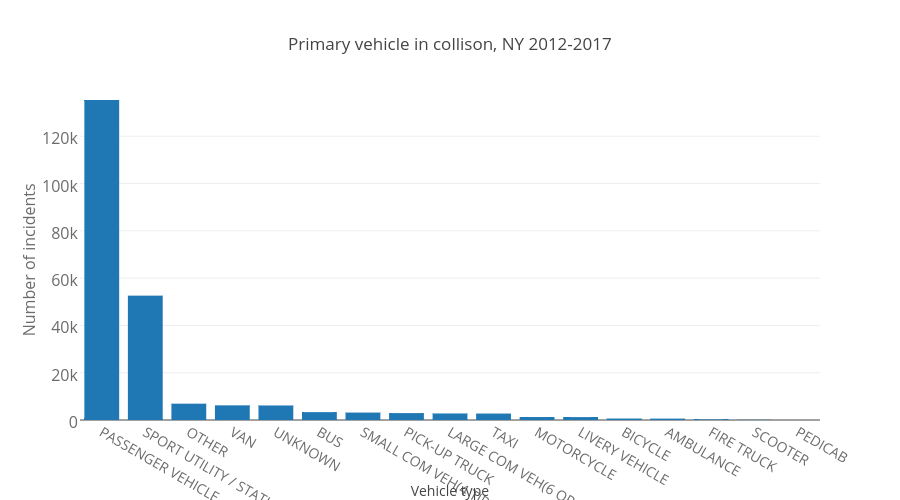

In [109]:
# Replace NaN with 'unknown'
vehicle_types = traffic_data['VEHICLE TYPE CODE 1'].replace(np.NaN, 'UNKNOWN')

# Count number of occurences of the different categories
collision_count = Counter()
for collision in vehicle_types:
    collision_count[collision] += 1
collision_count

# Plot bar chart of vehicle types involved in collisions
labels, values = zip(*collision_count.most_common())

# Plotting color
bgBorder  = 'rgba(255, 255, 255, 0)'
ticksAxes = 'rgb(107, 107, 107)'

data = [go.Bar(
          x = labels,
          y = values
)]

# Setting layout details for plot
layout = go.Layout(
    title='Primary vehicle in collison, NY 2012-2017',
    autosize=False,
    width=900,
    height=500,

    xaxis=dict(
        title='Vehicle type',
        tickfont=dict(
            size=14,
            color=ticksAxes
        )
    ),
    
    yaxis=dict(
        range=[min(values)-1,max(values)+1],
        title='Number of incidents',
        titlefont=dict(
            size=16,
            color=ticksAxes
        ),
        tickfont=dict(
            size=16,
            color=ticksAxes
        )
    ),
    
    legend=dict(
        x=0,
        y=1.0,
        bgcolor=bgBorder,
        bordercolor=bgBorder
    )
)

fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig, filename='vehicles.png')
Image('vehicles.png') # Display a static image

In [110]:
# Replace NaN with 'Unspecified'
factor_types = traffic_data['CONTRIBUTING FACTOR VEHICLE 1'].replace(np.NaN, 'Unspecified')

# Count number of occurences of the different categories
factor_count = Counter()
for factor in factor_types:
    factor_count[factor] += 1
    
# Remove unspecified in order to get a better picture of remaining entries
del factor_count['Unspecified']

# Plot bar chart of vehicle types involved in collisions
labels, values = zip(*factor_count.most_common())

# Plotting color
bgBorder  = 'rgba(255, 255, 255, 0)'
ticksAxes = 'rgb(107, 107, 107)'

data = [go.Bar(
          x = labels,
          y = values
)]

# Setting layout details for plot
layout = go.Layout(
    title='Contributing factors for collisions, NY 2012-2017',
    autosize=False,
    width=900,
    height=500,

    xaxis=dict(
        title='Reason/factor',
        tickfont=dict(
            size=14,
            color=ticksAxes
        )
    ),
    
    yaxis=dict(
        range=[min(values)-1,max(values)+1],
        title='Number of incidents',
        titlefont=dict(
            size=16,
            color=ticksAxes
        ),
        tickfont=dict(
            size=16,
            color=ticksAxes
        )
    ),
    
    legend=dict(
        x=0,
        y=1.0,
        bgcolor=bgBorder,
        bordercolor=bgBorder
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='style-bar')
#py.image.save_as(fig, filename='factors.png')
#image('factors.png') # Display a static image

In [91]:
# Most common vehicles in collision
print "Most common vehicles involved in collisions:\n", collision_count.most_common(10)
print "Most common contributing factors for collisions:\n", factor_count.most_common(10)

Most common vehicles involved in collisions:
[('Driver Inattention/Distraction', 22698), ('Failure to Yield Right-of-Way', 11492), ('Fatigued/Drowsy', 7825), ('Backing Unsafely', 6747), ('Lost Consciousness', 4982), ('Other Vehicular', 3981), ('Prescription Medication', 3784), ('Turning Improperly', 3207), ('Traffic Control Disregarded', 2806), ('Physical Disability', 2645)]
Most common contributing factors for collisions:
[('Driver Inattention/Distraction', 22698), ('Failure to Yield Right-of-Way', 11492), ('Fatigued/Drowsy', 7825), ('Backing Unsafely', 6747), ('Lost Consciousness', 4982), ('Other Vehicular', 3981), ('Prescription Medication', 3784), ('Turning Improperly', 3207), ('Traffic Control Disregarded', 2806), ('Physical Disability', 2645)]


## <span style="color:green">Theory - theoretical tools</span>

### <span style="color:green">Describe which machine learning tools you use and why the tools you've chosen are right for the problem you're solving.</span>


### <span style="color:green">Talk about your model selection. How did you split the data in to test/training. Did you use cross validation?</span>

### <span style="color:green">Explain the model performance. How did you measure it? Are your results what you expected?</span>

## <span style="color:green">Visualizations</span>

### <span style="color:green">Explain the visualizations you've chosen.</span>

### <span style="color:green">Why are they right for the story you want to tell?</span>

## <span style="color:green">Discussion - critical thinking</span>


### <span style="color:green">What went well?</span>


### <span style="color:green">What is still missing? What could be improved?, Why?</span>